In [14]:
#funciones generales
from numpy import *

def f(A,X):
    m=A.shape[0]
    n=A.shape[1]
    suMa = 0
    suNa = 0
    Iesimo = 0
    for i in range(0,m):
        Iesimo = 1-A[i,:]*X
        if (Iesimo > 0):
            suMa += -log(Iesimo)
        else:
            return nan
    for i in range(0,n):
        Iesimo = 1-power(X[i,0],2)
        if (Iesimo > 0):
            suNa += -log(Iesimo)
        else:
            return nan
    return (suMa+suNa)

def gradf(A,X):
    m=A.shape[0]
    n=A.shape[1]
    suMai = matrix(zeros((n,1)))
    suNai = matrix(zeros((n,1)))
    for j in range(0,n):
        for i in range(0,m):
            suMai[j,0] += A[i,j]/(1-A[i,:]*X)
    for i in range(0,n):
        suNai[i,0] += 2*X[i,0]/(1-power(X[i],2))
    return (suMai+suNai)

def gradf2(A,X):
    n=A.shape[1]
    suMai = matrix(zeros((n,n)))
    for j in range(0,n):
        for i in range(0,n):
            if (i==j):
                suMai[j,i] += power(A[i,j]/(1-A[i,:]*X),2) + (2+2*power(X[i],2))/power((1-power(X[i],2)),2)
    return (suMai)

def gradiente_backtracking(A,X0,m,n,alfa,beta):
    # inicializacion k=0
    i = 0
    XK = X0
    print("iteracion: "+str(i)+", cond. de parada: "+str(linalg.norm(gradf(A,XK))))
    while (linalg.norm(gradf(A,XK))>1e-3):
        i+=1
        # Determinar deltaX^k
        deltaXK = -gradf(A,XK)
        # Determinar t con Back Tracking Search
        tK = 1
        # Si se sale del dominio con el t=1
        while ~(isfinite(f(A,XK+tK*deltaXK))):
            tK = 0.9*tK
        while (f(A,XK+tK*deltaXK) > f(A,XK)+alfa*tK*gradf(A,XK).transpose()*deltaXK):
            tK = beta*tK
        t = tK
        # Calculo de X(k+1)
        XK1 = XK + tK*deltaXK
        XK = XK1
        print("iteracion: "+str(i)+", tK="+str(t)+", cond. de parada: "+str(linalg.norm(gradf(A,XK)))+", funcion objetivo: "+str(f(A,XK)))
    return i

def newton_backtracking(A,X0,m,n,alfa,beta):
    # inicializacion k=0
    i = 0
    XK = X0
    print("iteracion: "+str(i)+", cond. de parada: "+str(linalg.norm(gradf(A,XK))))
    while (True):
        i+=1
        # Determinar deltaX^k
        deltaXK = -linalg.inv(gradf2(A,XK))*gradf(A,XK)
        # Criterio de parada
        lambda2 = -gradf(A,XK).transpose()*deltaXK
        if (lambda2 <= 1e-8):
            break
        # Determinar t con Back Tracking Search
        tK = 1
        # Si se sale del dominio con el t=1
        while ~(isfinite(f(A,XK+tK*deltaXK))):
            tK = 0.9*tK
        while (f(A,XK+tK*deltaXK) > f(A,XK)+alfa*tK*gradf(A,XK).transpose()*deltaXK):
            tK = beta*tK
        t = tK
        # Calculo de X(k+1)
        XK1 = XK + tK*deltaXK
        XK = XK1
        print("iteracion: "+str(i)+", tK="+str(t)+", cond. de parada: "+str(lambda2)+", funcion objetivo: "+str(f(A,XK)))
    return i

In [ ]:
#calculo de ambos metodos
random.seed(0)
m = [50, 100, 200, 200, 400]
n = [10, 50, 100, 200, 250]
instancia = range(1,6)
alfa = 0.3
beta = 0.5
for i in instancia:
    print("------------------------------------------------------")
    print("instancia "+str(i)+" Metodo del gradiente con backtracking search")
    print("------------------------------------------------------")
    A = matrix(random.rand(m[i-1],n[i-1]))
    X0 = matrix(zeros((n[i-1],1)))
    XK = X0
    # backtracking search method
    gradiente_backtracking(A,X0,m[i-1],n[i-1],alfa,beta)
    print("------------------------------------------------------")
    print("instancia "+str(i)+" Metodo de Newton con backtracking search")
    print("------------------------------------------------------")
    newton_backtracking(A,X0,m,n,alfa,beta)

------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search
------------------------------------------------------
iteracion: 0, cond. de parada: 78.78590913682079
iteracion: 1, tK=0.030903154382632643, cond. de parada: 10.265345035346607, funcion objetivo: [[-68.39545745]]
iteracion: 2, tK=0.00938091470606245, cond. de parada: 3.9046694434137055, funcion objetivo: [[-68.86590811]]
iteracion: 3, tK=0.0375236588242498, cond. de parada: 0.6998344634372842, funcion objetivo: [[-69.18567037]]
iteracion: 4, tK=0.03690562500000001, cond. de parada: 0.17738099593797346, funcion objetivo: [[-69.19384314]]
iteracion: 5, tK=0.03125, cond. de parada: 0.050292269052584895, funcion objetivo: [[-69.19422709]]
iteracion: 6, tK=0.03125, cond. de parada: 0.017450671880101007, funcion objetivo: [[-69.19425334]]
iteracion: 7, tK=0.03125, cond. de parada: 0.005987760737438966, funcion objetivo: [[-69.19425649]]
iteracion: 8, tK=0.03125, cond. de parada: 

In [18]:
#variacion de alfa
random.seed(0)
m = [50, 100, 200, 200, 400]
n = [10, 50, 100, 200, 250]
instancia = range(1,6)
incremento = range(0,11)
datos_grad = matrix(zeros((5,11)))
datos_new = matrix(zeros((5,11)))
for i in instancia:
    alfa = 0.03
    beta = 0.5
    for j in incremento:
        alfa = 0.03+0.03*j
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo del gradiente con backtracking search: "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        A = matrix(random.rand(m[i-1],n[i-1]))
        X0 = matrix(zeros((n[i-1],1)))
        XK = X0
        # backtracking search method
        datos_grad[i-1,j] = gradiente_backtracking(A,X0,m[i-1],n[i-1],alfa,beta)
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo de Newton con backtracking search "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        datos_new[i-1,j] = newton_backtracking(A,X0,m,n,alfa,beta)

------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search: , alfa=0.03
------------------------------------------------------
iteracion: 0, cond. de parada: 78.78590913682079
iteracion: 1, tK=0.030903154382632643, cond. de parada: 10.265345035346607, funcion objetivo: [[-68.39545745]]
iteracion: 2, tK=0.0187618294121249, cond. de parada: 3.9584565858416987, funcion objetivo: [[-68.89662817]]
iteracion: 3, tK=0.04431469059826254, cond. de parada: 1.8931276171354452, funcion objetivo: [[-69.15812062]]
iteracion: 4, tK=0.03125, cond. de parada: 0.7934871935706316, funcion objetivo: [[-69.18576665]]
iteracion: 5, tK=0.025736391511831137, cond. de parada: 0.015361915404909075, funcion objetivo: [[-69.19425344]]
iteracion: 6, tK=0.03125, cond. de parada: 0.0033341995356952346, funcion objetivo: [[-69.19425677]]
iteracion: 7, tK=0.03125, cond. de parada: 0.0011065750436844977, funcion objetivo: [[-69.19425689]]
iteracion: 8, tK=0.03125, co

iteracion: 6, tK=1, cond. de parada: [[4.18345825e-05]], funcion objetivo: [[-70.72628031]]
iteracion: 7, tK=1, cond. de parada: [[6.66607881e-08]], funcion objetivo: [[-70.72628034]]
------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search: , alfa=0.15
------------------------------------------------------
iteracion: 0, cond. de parada: 79.38656042211929
iteracion: 1, tK=0.03815204244769462, cond. de parada: 322.75235593352744, funcion objetivo: [[-59.58994059]]
iteracion: 2, tK=0.00019883392003549843, cond. de parada: 61.7127466601267, funcion objetivo: [[-63.45480094]]
iteracion: 3, tK=0.0065418454128420124, cond. de parada: 4.333489435849873, funcion objetivo: [[-69.8924203]]
iteracion: 4, tK=0.023162752360648024, cond. de parada: 0.8159025923989595, funcion objetivo: [[-70.11417318]]
iteracion: 5, tK=0.03530369206012502, cond. de parada: 0.06334401914796492, funcion objetivo: [[-70.12587787]]
iteracion: 6, tK=0.03125, cond. de

iteracion: 6, tK=0.03125, cond. de parada: 0.025992285524493997, funcion objetivo: [[-69.29878264]]
iteracion: 7, tK=0.03125, cond. de parada: 0.004444344796912329, funcion objetivo: [[-69.29879406]]
iteracion: 8, tK=0.03125, cond. de parada: 0.0009100023877951454, funcion objetivo: [[-69.29879442]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.27
------------------------------------------------------
iteracion: 0, cond. de parada: 78.39061080285886
iteracion: 1, tK=0.06461081889226679, cond. de parada: [[2828.69051879]], funcion objetivo: [[-67.58917199]]
iteracion: 2, tK=0.32805000000000006, cond. de parada: [[5.76735378]], funcion objetivo: [[-68.9754938]]
iteracion: 3, tK=1, cond. de parada: [[0.5882867]], funcion objetivo: [[-69.2407129]]
iteracion: 4, tK=1, cond. de parada: [[0.10928694]], funcion objetivo: [[-69.29706361]]
iteracion: 5, tK=1, cond. de parada: [[0.00337539]], funcion objetivo: [[-69.2987906]]


iteracion: 9, tK=1, cond. de parada: [[3.94500136e-08]], funcion objetivo: [[-256.97642549]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.06
------------------------------------------------------
iteracion: 0, cond. de parada: 348.7940022831825
iteracion: 1, tK=0.016423203268260675, cond. de parada: 24.001452879972444, funcion objetivo: [[-248.79407698]]
iteracion: 2, tK=0.051472783023662275, cond. de parada: 4.800945691236922, funcion objetivo: [[-255.06617214]]
iteracion: 3, tK=0.12709329141645007, cond. de parada: 2.967866531915734, funcion objetivo: [[-256.10703017]]
iteracion: 4, tK=0.0625, cond. de parada: 0.1643090654788029, funcion objetivo: [[-256.3652078]]
iteracion: 5, tK=0.125, cond. de parada: 0.13137915986857227, funcion objetivo: [[-256.3656173]]
iteracion: 6, tK=0.0625, cond. de parada: 0.01124076882743653, funcion objetivo: [[-256.36618542]]
iteracion: 7, tK=0.125, cond. de parada: 0.006801086

iteracion: 3, tK=0.10761680250000004, cond. de parada: 2.682795817406411, funcion objetivo: [[-257.72516289]]
iteracion: 4, tK=0.0625, cond. de parada: 0.1116991550959469, funcion objetivo: [[-257.94073398]]
iteracion: 5, tK=0.125, cond. de parada: 0.06948342416823147, funcion objetivo: [[-257.94107961]]
iteracion: 6, tK=0.0625, cond. de parada: 0.010241120638049134, funcion objetivo: [[-257.94124673]]
iteracion: 7, tK=0.125, cond. de parada: 0.005266925542432281, funcion objetivo: [[-257.94125008]]
iteracion: 8, tK=0.125, cond. de parada: 0.0031635414831172846, funcion objetivo: [[-257.94125081]]
iteracion: 9, tK=0.125, cond. de parada: 0.0021701926053227837, funcion objetivo: [[-257.94125102]]
iteracion: 10, tK=0.0625, cond. de parada: 0.00032905339645956526, funcion objetivo: [[-257.94125118]]
------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.15
------------------------------------------------------
iteracion: 0, con

iteracion: 0, cond. de parada: 352.0041069852993
iteracion: 1, tK=0.01716841910146258, cond. de parada: [[52229.71566941]], funcion objetivo: [[-222.51706082]]
iteracion: 2, tK=0.19371024450000007, cond. de parada: [[290.22007709]], funcion objetivo: [[-255.76778875]]
iteracion: 3, tK=0.5, cond. de parada: [[5.28249715]], funcion objetivo: [[-257.31435228]]
iteracion: 4, tK=1, cond. de parada: [[0.08030189]], funcion objetivo: [[-257.33985348]]
iteracion: 5, tK=1, cond. de parada: [[0.01080672]], funcion objetivo: [[-257.34359057]]
iteracion: 6, tK=1, cond. de parada: [[0.00103151]], funcion objetivo: [[-257.34393508]]
iteracion: 7, tK=1, cond. de parada: [[0.0001136]], funcion objetivo: [[-257.34397343]]
iteracion: 8, tK=1, cond. de parada: [[1.19816909e-05]], funcion objetivo: [[-257.34397746]]
iteracion: 9, tK=1, cond. de parada: [[1.28207804e-06]], funcion objetivo: [[-257.34397789]]
iteracion: 10, tK=1, cond. de parada: [[1.36548187e-07]], funcion objetivo: [[-257.34397794]]
itera

iteracion: 10, tK=1, cond. de parada: [[1.78676653e-07]], funcion objetivo: [[-257.36510631]]
iteracion: 11, tK=1, cond. de parada: [[1.90446896e-08]], funcion objetivo: [[-257.36510632]]
------------------------------------------------------
instancia 3 Metodo del gradiente con backtracking search: , alfa=0.03
------------------------------------------------------
iteracion: 0, cond. de parada: 1000.8719991128648
iteracion: 1, tK=0.008727963568087723, cond. de parada: 69.57501203674882, funcion objetivo: [[-612.09929314]]
iteracion: 2, tK=0.0523347633027361, cond. de parada: 19.70210130065938, funcion objetivo: [[-629.37483273]]
iteracion: 3, tK=0.0926510094425921, cond. de parada: 7.3705439125654975, funcion objetivo: [[-645.99764567]]
iteracion: 4, tK=0.14121476824050008, cond. de parada: 6.241405729869474, funcion objetivo: [[-647.43390677]]
iteracion: 5, tK=0.12709329141645007, cond. de parada: 5.058892500208508, funcion objetivo: [[-648.35780018]]
iteracion: 6, tK=0.0625, cond. d

iteracion: 0, cond. de parada: 1002.3153794683503
iteracion: 1, tK=0.004363981784043861, cond. de parada: 32.88587429791137, funcion objetivo: [[-604.86686726]]
iteracion: 2, tK=0.06754258588364964, cond. de parada: 6.049567822527065, funcion objetivo: [[-648.0239711]]
iteracion: 3, tK=0.11957422500000003, cond. de parada: 4.760235031618729, funcion objetivo: [[-648.75668353]]
iteracion: 4, tK=0.0625, cond. de parada: 0.24773108362932433, funcion objetivo: [[-649.4182626]]
iteracion: 5, tK=0.0625, cond. de parada: 0.03479509987484177, funcion objetivo: [[-649.42036263]]
iteracion: 6, tK=0.125, cond. de parada: 0.01764657943158835, funcion objetivo: [[-649.42040115]]
iteracion: 7, tK=0.125, cond. de parada: 0.010298803401641706, funcion objetivo: [[-649.42040968]]
iteracion: 8, tK=0.125, cond. de parada: 0.007119888887657926, funcion objetivo: [[-649.42041193]]
iteracion: 9, tK=0.0625, cond. de parada: 0.0010537290208098263, funcion objetivo: [[-649.42041369]]
iteracion: 10, tK=0.125, c

iteracion: 7, tK=0.125, cond. de parada: 0.014679394538843, funcion objetivo: [[-650.40689876]]
iteracion: 8, tK=0.125, cond. de parada: 0.008302391786639295, funcion objetivo: [[-650.40690471]]
iteracion: 9, tK=0.0625, cond. de parada: 0.0017517838415261801, funcion objetivo: [[-650.40690731]]
iteracion: 10, tK=0.125, cond. de parada: 0.0009897473982723795, funcion objetivo: [[-650.40690739]]
------------------------------------------------------
instancia 3 Metodo de Newton con backtracking search , alfa=0.21
------------------------------------------------------
iteracion: 0, cond. de parada: 1007.3885410196209
iteracion: 1, tK=0.0045620009078501875, cond. de parada: [[441258.4384776]], funcion objetivo: [[-476.37304924]]
iteracion: 2, tK=0.0926510094425921, cond. de parada: [[3333.30282465]], funcion objetivo: [[-636.0303889]]
iteracion: 3, tK=0.5, cond. de parada: [[63.71881327]], funcion objetivo: [[-649.94416232]]
iteracion: 4, tK=1, cond. de parada: [[1.12197141]], funcion obje

iteracion: 0, cond. de parada: 990.4451372264449
iteracion: 1, tK=0.0022810004539250937, cond. de parada: [[428595.14118081]], funcion objetivo: [[-353.41384951]]
iteracion: 2, tK=0.0492385451091806, cond. de parada: [[13336.88500415]], funcion objetivo: [[-619.16361809]]
iteracion: 3, tK=0.36450000000000005, cond. de parada: [[152.79817924]], funcion objetivo: [[-647.11479232]]
iteracion: 4, tK=1, cond. de parada: [[0.12888728]], funcion objetivo: [[-647.16144704]]
iteracion: 5, tK=1, cond. de parada: [[0.01024641]], funcion objetivo: [[-647.16481959]]
iteracion: 6, tK=1, cond. de parada: [[0.00119477]], funcion objetivo: [[-647.16522238]]
iteracion: 7, tK=1, cond. de parada: [[0.00012687]], funcion objetivo: [[-647.1652648]]
iteracion: 8, tK=1, cond. de parada: [[1.39212413e-05]], funcion objetivo: [[-647.16526947]]
iteracion: 9, tK=1, cond. de parada: [[1.51138013e-06]], funcion objetivo: [[-647.16526997]]
iteracion: 10, tK=1, cond. de parada: [[1.64666865e-07]], funcion objetivo: [

iteracion: 5, tK=1, cond. de parada: [[0.12853238]], funcion objetivo: [[-733.15227673]]
iteracion: 6, tK=1, cond. de parada: [[0.02784636]], funcion objetivo: [[-733.1590741]]
iteracion: 7, tK=1, cond. de parada: [[0.00720219]], funcion objetivo: [[-733.1609224]]
iteracion: 8, tK=1, cond. de parada: [[0.00171691]], funcion objetivo: [[-733.16135224]]
iteracion: 9, tK=1, cond. de parada: [[0.00042668]], funcion objetivo: [[-733.16146038]]
iteracion: 10, tK=1, cond. de parada: [[0.00010391]], funcion objetivo: [[-733.16148656]]
iteracion: 11, tK=1, cond. de parada: [[2.55627376e-05]], funcion objetivo: [[-733.16149302]]
iteracion: 12, tK=1, cond. de parada: [[6.25730455e-06]], funcion objetivo: [[-733.1614946]]
iteracion: 13, tK=1, cond. de parada: [[1.53547483e-06]], funcion objetivo: [[-733.16149498]]
iteracion: 14, tK=1, cond. de parada: [[3.76327609e-07]], funcion objetivo: [[-733.16149508]]
iteracion: 15, tK=1, cond. de parada: [[9.22896559e-08]], funcion objetivo: [[-733.1614951]]

------------------------------------------------------
instancia 4 Metodo de Newton con backtracking search , alfa=0.15
------------------------------------------------------
iteracion: 0, cond. de parada: 1420.6541653162585
iteracion: 1, tK=0.0045620009078501875, cond. de parada: [[876804.30307014]], funcion objetivo: [[-600.54175329]]
iteracion: 2, tK=0.17433922005000008, cond. de parada: [[1690.08189725]], funcion objetivo: [[-732.89400778]]
iteracion: 3, tK=1, cond. de parada: [[4.26540716]], funcion objetivo: [[-733.5523676]]
iteracion: 4, tK=1, cond. de parada: [[1.72061413]], funcion objetivo: [[-734.09858114]]
iteracion: 5, tK=1, cond. de parada: [[0.24834362]], funcion objetivo: [[-734.15511566]]
iteracion: 6, tK=1, cond. de parada: [[0.07088586]], funcion objetivo: [[-734.17394091]]
iteracion: 7, tK=1, cond. de parada: [[0.01587897]], funcion objetivo: [[-734.17784894]]
iteracion: 8, tK=1, cond. de parada: [[0.00405543]], funcion objetivo: [[-734.17888531]]
iteracion: 9, tK=1

iteracion: 8, tK=0.25, cond. de parada: 0.0045911800448294035, funcion objetivo: [[-733.78819725]]
iteracion: 9, tK=0.125, cond. de parada: 0.0010653787726024881, funcion objetivo: [[-733.78819874]]
iteracion: 10, tK=0.25, cond. de parada: 0.0005901002954089571, funcion objetivo: [[-733.78819881]]
------------------------------------------------------
instancia 4 Metodo de Newton con backtracking search , alfa=0.24
------------------------------------------------------
iteracion: 0, cond. de parada: 1418.0551258711153
iteracion: 1, tK=0.0020529004085325844, cond. de parada: [[875315.83362151]], funcion objetivo: [[-458.42262023]]
iteracion: 2, tK=0.08338590849833288, cond. de parada: [[9470.57654277]], funcion objetivo: [[-727.75162729]]
iteracion: 3, tK=0.5, cond. de parada: [[23.41104107]], funcion objetivo: [[-733.78172477]]
iteracion: 4, tK=1, cond. de parada: [[0.01478863]], funcion objetivo: [[-733.78773426]]
iteracion: 5, tK=1, cond. de parada: [[0.00138541]], funcion objetivo: 

iteracion: 6, tK=0.5, cond. de parada: [[0.00034379]], funcion objetivo: [[-734.06341521]]
iteracion: 7, tK=0.5, cond. de parada: [[2.38427822e-05]], funcion objetivo: [[-734.06342285]]
iteracion: 8, tK=1, cond. de parada: [[2.04333266e-06]], funcion objetivo: [[-734.06342354]]
iteracion: 9, tK=0.5, cond. de parada: [[3.27601137e-07]], funcion objetivo: [[-734.06342364]]
iteracion: 10, tK=0.5, cond. de parada: [[2.08756094e-08]], funcion objetivo: [[-734.06342365]]
------------------------------------------------------
instancia 5 Metodo del gradiente con backtracking search: , alfa=0.03
------------------------------------------------------
iteracion: 0, cond. de parada: 3169.519035079641
iteracion: 1, tK=0.0041745579179292966, cond. de parada: 62.49319227322359, funcion objetivo: [[-1560.82149315]]
iteracion: 2, tK=0.051472783023662275, cond. de parada: 6.299542172487342, funcion objetivo: [[-1625.33852273]]
iteracion: 3, tK=0.17433922005000008, cond. de parada: 6.4393817677063, func

KeyboardInterrupt: 

In [42]:
%matplotlib inline 
# graficos de 4 instancias metodo de gradiente para alfa variando
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = arange(0.03, 0.33, 0.03)

# red dashes, blue squares and green triangles
plt.plot(t, array(datos_grad[0,:])[0], 'r--', t, array(datos_grad[1,:])[0], 'b--', t, array(datos_grad[2,:])[0], 'g--', t, array(datos_grad[3,:])[0], 'c--')
plt.title("Comparación de iteraciones metodo gradiente vs alfa")
plt.xlabel("Valor de alfa")
plt.ylabel("Cantidad de iteraciones")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [41]:
# graficos de 4 instancias metodo de newton para alfa variando
plt.plot(t, array(datos_new[0,:])[0], 'r--', t, array(datos_new[1,:])[0], 'b--', t, array(datos_new[2,:])[0], 'g--', t, array(datos_new[3,:])[0], 'c--')
plt.title("Comparación de iteraciones metodo de Newton vs alfa")
plt.xlabel("Valor de alfa")
plt.ylabel("Cantidad de iteraciones")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [39]:
#variacion de alfa para instancias 1 y 2
random.seed(0)
m = [50, 100, 200, 200, 400]
n = [10, 50, 100, 200, 250]
instancia = range(1,3)
incremento = range(0,21)
datos_grad = matrix(zeros((2,21)))
datos_new = matrix(zeros((2,21)))
for i in instancia:
    alfa = 0.03
    beta = 0.5
    for j in incremento:
        alfa = 0.03+0.03*j
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo del gradiente con backtracking search: "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        A = matrix(random.rand(m[i-1],n[i-1]))
        X0 = matrix(zeros((n[i-1],1)))
        XK = X0
        # backtracking search method
        datos_grad[i-1,j] = gradiente_backtracking(A,X0,m[i-1],n[i-1],alfa,beta)
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo de Newton con backtracking search "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        datos_new[i-1,j] = newton_backtracking(A,X0,m,n,alfa,beta)

------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search: , alfa=0.03
------------------------------------------------------
iteracion: 0, cond. de parada: 78.78590913682079
iteracion: 1, tK=0.030903154382632643, cond. de parada: 10.265345035346607, funcion objetivo: [[-68.39545745]]
iteracion: 2, tK=0.0187618294121249, cond. de parada: 3.9584565858416987, funcion objetivo: [[-68.89662817]]
iteracion: 3, tK=0.04431469059826254, cond. de parada: 1.8931276171354452, funcion objetivo: [[-69.15812062]]
iteracion: 4, tK=0.03125, cond. de parada: 0.7934871935706316, funcion objetivo: [[-69.18576665]]
iteracion: 5, tK=0.025736391511831137, cond. de parada: 0.015361915404909075, funcion objetivo: [[-69.19425344]]
iteracion: 6, tK=0.03125, cond. de parada: 0.0033341995356952346, funcion objetivo: [[-69.19425677]]
iteracion: 7, tK=0.03125, cond. de parada: 0.0011065750436844977, funcion objetivo: [[-69.19425689]]
iteracion: 8, tK=0.03125, co

iteracion: 5, tK=1, cond. de parada: [[0.00757958]], funcion objetivo: [[-70.72625961]]
iteracion: 6, tK=1, cond. de parada: [[4.18345825e-05]], funcion objetivo: [[-70.72628031]]
iteracion: 7, tK=1, cond. de parada: [[6.66607881e-08]], funcion objetivo: [[-70.72628034]]
------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search: , alfa=0.15
------------------------------------------------------
iteracion: 0, cond. de parada: 79.38656042211929
iteracion: 1, tK=0.03815204244769462, cond. de parada: 322.75235593352744, funcion objetivo: [[-59.58994059]]
iteracion: 2, tK=0.00019883392003549843, cond. de parada: 61.7127466601267, funcion objetivo: [[-63.45480094]]
iteracion: 3, tK=0.0065418454128420124, cond. de parada: 4.333489435849873, funcion objetivo: [[-69.8924203]]
iteracion: 4, tK=0.023162752360648024, cond. de parada: 0.8159025923989595, funcion objetivo: [[-70.11417318]]
iteracion: 5, tK=0.03530369206012502, cond. de parada: 0.

iteracion: 5, tK=0.04842756112500002, cond. de parada: 0.2825092323996359, funcion objetivo: [[-69.29754175]]
iteracion: 6, tK=0.03125, cond. de parada: 0.025992285524493997, funcion objetivo: [[-69.29878264]]
iteracion: 7, tK=0.03125, cond. de parada: 0.004444344796912329, funcion objetivo: [[-69.29879406]]
iteracion: 8, tK=0.03125, cond. de parada: 0.0009100023877951454, funcion objetivo: [[-69.29879442]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.27
------------------------------------------------------
iteracion: 0, cond. de parada: 78.39061080285886
iteracion: 1, tK=0.06461081889226679, cond. de parada: [[2828.69051879]], funcion objetivo: [[-67.58917199]]
iteracion: 2, tK=0.32805000000000006, cond. de parada: [[5.76735378]], funcion objetivo: [[-68.9754938]]
iteracion: 3, tK=1, cond. de parada: [[0.5882867]], funcion objetivo: [[-69.2407129]]
iteracion: 4, tK=1, cond. de parada: [[0.10928694]], funcion obje

iteracion: 7, tK=0.03125, cond. de parada: 0.004915020919295705, funcion objetivo: [[-69.68829491]]
iteracion: 8, tK=0.03125, cond. de parada: 0.0010318646052789656, funcion objetivo: [[-69.68829524]]
iteracion: 9, tK=0.03125, cond. de parada: 0.0002262652039815727, funcion objetivo: [[-69.68829525]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.39
------------------------------------------------------
iteracion: 0, cond. de parada: 78.93628841898548
iteracion: 1, tK=0.03589489938459266, cond. de parada: [[2661.23312657]], funcion objetivo: [[-51.45534085]]
iteracion: 2, tK=0.2058911320946491, cond. de parada: [[180.27024935]], funcion objetivo: [[-68.77368849]]
iteracion: 3, tK=1, cond. de parada: [[1.25896716]], funcion objetivo: [[-69.51014444]]
iteracion: 4, tK=1, cond. de parada: [[0.2609112]], funcion objetivo: [[-69.66311098]]
iteracion: 5, tK=1, cond. de parada: [[0.04382807]], funcion objetivo: [[-69.687448

iteracion: 2, tK=0.11438396227480506, cond. de parada: [[198.40553239]], funcion objetivo: [[-65.14539514]]
iteracion: 3, tK=0.36450000000000005, cond. de parada: [[13.3732554]], funcion objetivo: [[-68.1945815]]
iteracion: 4, tK=0.5, cond. de parada: [[0.12121448]], funcion objetivo: [[-68.23652282]]
iteracion: 5, tK=0.5, cond. de parada: [[0.01519809]], funcion objetivo: [[-68.24187328]]
iteracion: 6, tK=0.5, cond. de parada: [[0.00239726]], funcion objetivo: [[-68.24272194]]
iteracion: 7, tK=0.5, cond. de parada: [[0.00040619]], funcion objetivo: [[-68.24286606]]
iteracion: 8, tK=0.5, cond. de parada: [[7.07886058e-05]], funcion objetivo: [[-68.2428912]]
iteracion: 9, tK=0.5, cond. de parada: [[1.24947816e-05]], funcion objetivo: [[-68.24289564]]
iteracion: 10, tK=0.5, cond. de parada: [[2.22118172e-06]], funcion objetivo: [[-68.24289643]]
iteracion: 11, tK=0.5, cond. de parada: [[3.9702713e-07]], funcion objetivo: [[-68.24289657]]
iteracion: 12, tK=0.5, cond. de parada: [[7.1372307

iteracion: 1, tK=0.019941610769218143, cond. de parada: [[2514.07158024]], funcion objetivo: [[-34.04535132]]
iteracion: 2, tK=0.06754258588364964, cond. de parada: [[572.75071869]], funcion objetivo: [[-60.45429499]]
iteracion: 3, tK=0.19371024450000007, cond. de parada: [[51.50352282]], funcion objetivo: [[-67.68233846]]
iteracion: 4, tK=0.5, cond. de parada: [[3.202511]], funcion objetivo: [[-68.64237613]]
iteracion: 5, tK=0.5, cond. de parada: [[0.0285709]], funcion objetivo: [[-68.65239739]]
iteracion: 6, tK=0.5, cond. de parada: [[0.00430451]], funcion objetivo: [[-68.65391874]]
iteracion: 7, tK=0.5, cond. de parada: [[0.00071605]], funcion objetivo: [[-68.65417253]]
iteracion: 8, tK=0.5, cond. de parada: [[0.00012349]], funcion objetivo: [[-68.65421635]]
iteracion: 9, tK=0.5, cond. de parada: [[2.16081879e-05]], funcion objetivo: [[-68.65422402]]
iteracion: 10, tK=0.5, cond. de parada: [[3.80370045e-06]], funcion objetivo: [[-68.65422537]]
iteracion: 11, tK=0.5, cond. de parada:

iteracion: 0, cond. de parada: 348.7940022831825
iteracion: 1, tK=0.016423203268260675, cond. de parada: 24.001452879972444, funcion objetivo: [[-248.79407698]]
iteracion: 2, tK=0.051472783023662275, cond. de parada: 4.800945691236922, funcion objetivo: [[-255.06617214]]
iteracion: 3, tK=0.12709329141645007, cond. de parada: 2.967866531915734, funcion objetivo: [[-256.10703017]]
iteracion: 4, tK=0.0625, cond. de parada: 0.1643090654788029, funcion objetivo: [[-256.3652078]]
iteracion: 5, tK=0.125, cond. de parada: 0.13137915986857227, funcion objetivo: [[-256.3656173]]
iteracion: 6, tK=0.125, cond. de parada: 0.11568275845385174, funcion objetivo: [[-256.36574489]]
iteracion: 7, tK=0.125, cond. de parada: 0.10471232514478561, funcion objetivo: [[-256.36583556]]
iteracion: 8, tK=0.125, cond. de parada: 0.09665888949610064, funcion objetivo: [[-256.36588551]]
iteracion: 9, tK=0.125, cond. de parada: 0.08966058052127128, funcion objetivo: [[-256.3659314]]
iteracion: 10, tK=0.125, cond. de

iteracion: 5, tK=1, cond. de parada: [[0.01591366]], funcion objetivo: [[-256.36606401]]
iteracion: 6, tK=1, cond. de parada: [[0.00026251]], funcion objetivo: [[-256.36618858]]
iteracion: 7, tK=1, cond. de parada: [[4.89616862e-06]], funcion objetivo: [[-256.36619024]]
iteracion: 8, tK=1, cond. de parada: [[5.17676597e-07]], funcion objetivo: [[-256.36619041]]
iteracion: 9, tK=1, cond. de parada: [[5.51392543e-08]], funcion objetivo: [[-256.36619043]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.06
------------------------------------------------------
iteracion: 0, cond. de parada: 354.51445133996344
iteracion: 1, tK=0.016423203268260675, cond. de parada: 26.485100336738114, funcion objetivo: [[-248.92641778]]
iteracion: 2, tK=0.051472783023662275, cond. de parada: 5.338739458330594, funcion objetivo: [[-256.45833567]]
iteracion: 3, tK=0.12709329141645007, cond. de parada: 3.3324830069181943, funcion objetiv

iteracion: 1, tK=0.008211601634130337, cond. de parada: 24.277174710942973, funcion objetivo: [[-233.06754941]]
iteracion: 2, tK=0.06754258588364964, cond. de parada: 5.068623135562065, funcion objetivo: [[-256.88895442]]
iteracion: 3, tK=0.10761680250000004, cond. de parada: 2.6159385930731287, funcion objetivo: [[-257.75820162]]
iteracion: 4, tK=0.0625, cond. de parada: 0.13895576506158902, funcion objetivo: [[-257.96320662]]
iteracion: 5, tK=0.125, cond. de parada: 0.08954424456023766, funcion objetivo: [[-257.96373712]]
iteracion: 6, tK=0.0625, cond. de parada: 0.01115053087341244, funcion objetivo: [[-257.96400835]]
iteracion: 7, tK=0.125, cond. de parada: 0.005882214522720947, funcion objetivo: [[-257.96401231]]
iteracion: 8, tK=0.125, cond. de parada: 0.0037257340959634556, funcion objetivo: [[-257.96401314]]
iteracion: 9, tK=0.125, cond. de parada: 0.0025958203836346136, funcion objetivo: [[-257.96401342]]
iteracion: 10, tK=0.0625, cond. de parada: 0.0003873059910058773, funcio

iteracion: 9, tK=0.0625, cond. de parada: 0.0004986063399982849, funcion objetivo: [[-258.49261462]]
------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.24
------------------------------------------------------
iteracion: 0, cond. de parada: 356.63666747755855
iteracion: 1, tK=0.00858420955073129, cond. de parada: [[55268.97038358]], funcion objetivo: [[-172.74772518]]
iteracion: 2, tK=0.16677181699666577, cond. de parada: [[1566.26268183]], funcion objetivo: [[-251.44450131]]
iteracion: 3, tK=1, cond. de parada: [[10.82824547]], funcion objetivo: [[-257.66492649]]
iteracion: 4, tK=1, cond. de parada: [[1.5779343]], funcion objetivo: [[-258.44912206]]
iteracion: 5, tK=1, cond. de parada: [[0.08061441]], funcion objetivo: [[-258.49128634]]
iteracion: 6, tK=1, cond. de parada: [[0.00282858]], funcion objetivo: [[-258.49257734]]
iteracion: 7, tK=1, cond. de parada: [[9.77075707e-05]], funcion objetivo: [[-258.49261084]]
iter

iteracion: 6, tK=1, cond. de parada: [[0.00243946]], funcion objetivo: [[-257.87286907]]
iteracion: 7, tK=1, cond. de parada: [[0.00026112]], funcion objetivo: [[-257.87295735]]
iteracion: 8, tK=1, cond. de parada: [[2.73927945e-05]], funcion objetivo: [[-257.87296656]]
iteracion: 9, tK=1, cond. de parada: [[2.9372681e-06]], funcion objetivo: [[-257.87296755]]
iteracion: 10, tK=1, cond. de parada: [[3.12744577e-07]], funcion objetivo: [[-257.87296766]]
iteracion: 11, tK=1, cond. de parada: [[3.33763606e-08]], funcion objetivo: [[-257.87296767]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.36
------------------------------------------------------
iteracion: 0, cond. de parada: 356.38716927114024
iteracion: 1, tK=0.0020529004085325844, cond. de parada: 97.17301359059573, funcion objetivo: [[-127.57791386]]
iteracion: 2, tK=0.02616738165136805, cond. de parada: 19.739815959758545, funcion objetivo: [[-241.5268218

iteracion: 9, tK=0.5, cond. de parada: [[3.28777028e-06]], funcion objetivo: [[-257.3147108]]
iteracion: 10, tK=0.5, cond. de parada: [[3.72434818e-07]], funcion objetivo: [[-257.31471093]]
iteracion: 11, tK=0.5, cond. de parada: [[4.22216072e-08]], funcion objetivo: [[-257.31471094]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.44999999999999996
------------------------------------------------------
iteracion: 0, cond. de parada: 355.6310230933782
iteracion: 1, tK=0.0020529004085325844, cond. de parada: 97.2964506955796, funcion objetivo: [[-127.30877862]]
iteracion: 2, tK=0.02616738165136805, cond. de parada: 19.702159334570425, funcion objetivo: [[-241.41159939]]
iteracion: 3, tK=0.0750473176484996, cond. de parada: 2.7148481540385085, funcion objetivo: [[-257.89788517]]
iteracion: 4, tK=0.07381125000000002, cond. de parada: 0.7440892215599889, funcion objetivo: [[-258.22589592]]
iteracion: 5, tK=0.0625, co

iteracion: 9, tK=0.5, cond. de parada: [[1.6962927e-06]], funcion objetivo: [[-258.33495768]]
iteracion: 10, tK=0.5, cond. de parada: [[3.7902886e-07]], funcion objetivo: [[-258.33495782]]
iteracion: 11, tK=0.5, cond. de parada: [[8.94734068e-08]], funcion objetivo: [[-258.33495786]]
iteracion: 12, tK=0.5, cond. de parada: [[2.17277935e-08]], funcion objetivo: [[-258.33495786]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.54
------------------------------------------------------
iteracion: 0, cond. de parada: 357.2419802393895
iteracion: 1, tK=0.0010264502042662922, cond. de parada: 153.6429649434941, funcion objetivo: [[-83.47263175]]
iteracion: 2, tK=0.004769005305961828, cond. de parada: 70.16037852298297, funcion objetivo: [[-158.03169166]]
iteracion: 3, tK=0.01794744969229633, cond. de parada: 32.55824380645669, funcion objetivo: [[-218.15692536]]
iteracion: 4, tK=0.06078832729528468, cond. de parada: 7.6

iteracion: 11, tK=0.0625, cond. de parada: 0.006909557436784636, funcion objetivo: [[-257.85903547]]
iteracion: 12, tK=0.0625, cond. de parada: 0.0026581731445582176, funcion objetivo: [[-257.85903753]]
iteracion: 13, tK=0.0625, cond. de parada: 0.0010332423239841283, funcion objetivo: [[-257.85903784]]
iteracion: 14, tK=0.0625, cond. de parada: 0.00040489154852201155, funcion objetivo: [[-257.85903789]]
------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.6
------------------------------------------------------
iteracion: 0, cond. de parada: 353.98465347322644
iteracion: 1, tK=0.0021460523876828223, cond. de parada: [[54445.07016294]], funcion objetivo: [[-77.20247622]]
iteracion: 2, tK=0.008973724846148164, cond. de parada: [[12653.99034077]], funcion objetivo: [[-152.31027435]]
iteracion: 3, tK=0.0375236588242498, cond. de parada: [[2550.41289229]], funcion objetivo: [[-216.19032838]]
iteracion: 4, tK=0.0871696100250000

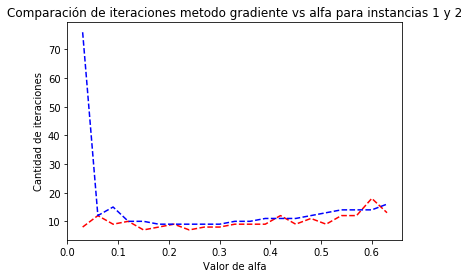

In [44]:
# graficos de 2 instancias metodo de gradiente para alfa variando
t = arange(0.03, 0.64, 0.03)
plt.plot(t, array(datos_grad[0,:])[0], 'r--', t, array(datos_grad[1,:])[0], 'b--')
plt.title("Comparación de iteraciones metodo gradiente vs alfa para instancias 1 y 2")
plt.xlabel("Valor de alfa")
plt.ylabel("Cantidad de iteraciones")
plt.show()

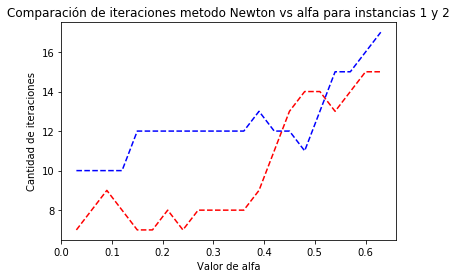

In [45]:
# graficos de 2 instancias metodo de newton para alfa variando
plt.plot(t, array(datos_new[0,:])[0], 'r--', t, array(datos_new[1,:])[0], 'b--')
plt.title("Comparación de iteraciones metodo Newton vs alfa para instancias 1 y 2")
plt.xlabel("Valor de alfa")
plt.ylabel("Cantidad de iteraciones")
plt.show()

In [47]:
#variacion de beta
random.seed(0)
m = [50, 100, 200, 200, 400]
n = [10, 50, 100, 200, 250]
instancia = range(1,3)
incremento = range(0,21)
datos_grad = matrix(zeros((2,21)))
datos_new = matrix(zeros((2,21)))
for i in instancia:
    alfa = 0.3
    beta = 0.1
    for j in incremento:
        beta = 0.1+0.01*j
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo del gradiente con backtracking search: "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        A = matrix(random.rand(m[i-1],n[i-1]))
        X0 = matrix(zeros((n[i-1],1)))
        XK = X0
        # backtracking search method
        datos_grad[i-1,j] = gradiente_backtracking(A,X0,m[i-1],n[i-1],alfa,beta)
        print("------------------------------------------------------")
        print("instancia "+str(i)+" Metodo de Newton con backtracking search "+", alfa="+str(alfa))
        print("------------------------------------------------------")
        datos_new[i-1,j] = newton_backtracking(A,X0,m,n,alfa,beta)

------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search: , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 78.78590913682079
iteracion: 1, tK=0.030903154382632643, cond. de parada: 10.265345035346607, funcion objetivo: [[-68.39545745]]
iteracion: 2, tK=0.015009463529699922, cond. de parada: 3.8395110124757554, funcion objetivo: [[-68.91286809]]
iteracion: 3, tK=0.010941898913151244, cond. de parada: 2.77980588062821, funcion objetivo: [[-69.05213022]]
iteracion: 4, tK=0.015009463529699922, cond. de parada: 1.654238311800395, funcion objetivo: [[-69.14467259]]
iteracion: 5, tK=0.02824295364810002, cond. de parada: 0.4217201607057118, funcion objetivo: [[-69.19103255]]
iteracion: 6, tK=0.008100000000000001, cond. de parada: 0.32666353644269575, funcion objetivo: [[-69.19231007]]
iteracion: 7, tK=0.010000000000000002, cond. de parada: 0.2367219650256622, funcion objetivo: [[-69.19322976]

iteracion: 7, tK=0.014400000000000003, cond. de parada: 0.059351566643338745, funcion objetivo: [[-70.58623742]]
iteracion: 8, tK=0.014400000000000003, cond. de parada: 0.04107129189647016, funcion objetivo: [[-70.5862803]]
iteracion: 9, tK=0.014400000000000003, cond. de parada: 0.028557071304690835, funcion objetivo: [[-70.58630088]]
iteracion: 10, tK=0.014400000000000003, cond. de parada: 0.019898221629193354, funcion objetivo: [[-70.58631084]]
iteracion: 11, tK=0.014400000000000003, cond. de parada: 0.013879318122825236, funcion objetivo: [[-70.58631568]]
iteracion: 12, tK=0.014400000000000003, cond. de parada: 0.00968663190439643, funcion objetivo: [[-70.58631804]]
iteracion: 13, tK=0.014400000000000003, cond. de parada: 0.006762921574721381, funcion objetivo: [[-70.58631918]]
iteracion: 14, tK=0.014400000000000003, cond. de parada: 0.004722849863632224, funcion objetivo: [[-70.58631974]]
iteracion: 15, tK=0.014400000000000003, cond. de parada: 0.0032987820409306643, funcion objeti

iteracion: 2, tK=0.0005632099886234801, cond. de parada: 21.49172618153697, funcion objetivo: [[-69.03797855]]
iteracion: 3, tK=0.0030394163647642345, cond. de parada: 9.772445828852776, funcion objetivo: [[-69.98527609]]
iteracion: 4, tK=0.007060738412025006, cond. de parada: 4.310697432179003, funcion objetivo: [[-70.45158595]]
iteracion: 5, tK=0.016402500000000007, cond. de parada: 0.9061712789173639, funcion objetivo: [[-70.62635443]]
iteracion: 6, tK=0.022500000000000006, cond. de parada: 0.20052776881849343, funcion objetivo: [[-70.63721637]]
iteracion: 7, tK=0.022500000000000006, cond. de parada: 0.0715020119148026, funcion objetivo: [[-70.63782476]]
iteracion: 8, tK=0.022500000000000006, cond. de parada: 0.027384831458928355, funcion objetivo: [[-70.63790414]]
iteracion: 9, tK=0.022500000000000006, cond. de parada: 0.010672119731764924, funcion objetivo: [[-70.63791585]]
iteracion: 10, tK=0.022500000000000006, cond. de parada: 0.004188139859915098, funcion objetivo: [[-70.63791

iteracion: 10, tK=0.0324, cond. de parada: 0.010782178793207723, funcion objetivo: [[-69.29879208]]
iteracion: 11, tK=0.0324, cond. de parada: 0.0022471346919954076, funcion objetivo: [[-69.29879434]]
iteracion: 12, tK=0.0324, cond. de parada: 0.00047903050251798146, funcion objetivo: [[-69.29879443]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 78.39061080285886
iteracion: 1, tK=0.06461081889226679, cond. de parada: [[2828.69051879]], funcion objetivo: [[-67.58917199]]
iteracion: 2, tK=0.11809800000000002, cond. de parada: [[5.76735378]], funcion objetivo: [[-68.21333169]]
iteracion: 3, tK=0.18, cond. de parada: [[3.11732976]], funcion objetivo: [[-68.70761294]]
iteracion: 4, tK=0.18, cond. de parada: [[1.40707225]], funcion objetivo: [[-68.93367147]]
iteracion: 5, tK=1, cond. de parada: [[0.7745238]], funcion objetivo: [[-69.2

iteracion: 20, tK=0.009261000000000002, cond. de parada: 0.0008320129754754288, funcion objetivo: [[-69.16381553]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 78.18701042928724
iteracion: 1, tK=0.01675095304614324, cond. de parada: [[2772.66381022]], funcion objetivo: [[-32.26875173]]
iteracion: 2, tK=0.13508517176729928, cond. de parada: [[663.3641488]], funcion objetivo: [[-62.30562376]]
iteracion: 3, tK=1, cond. de parada: [[4.02934461]], funcion objetivo: [[-64.92453658]]
iteracion: 4, tK=1, cond. de parada: [[2.24279668]], funcion objetivo: [[-66.3671793]]
iteracion: 5, tK=1, cond. de parada: [[1.27979553]], funcion objetivo: [[-67.21416728]]
iteracion: 6, tK=1, cond. de parada: [[0.93678139]], funcion objetivo: [[-67.85065027]]
iteracion: 7, tK=1, cond. de parada: [[0.79444222]], funcion objetivo: [[-68.39065262]]
iteraci

iteracion: 4, tK=0.024794911296000012, cond. de parada: 0.2912507164259023, funcion objetivo: [[-70.32610066]]
iteracion: 5, tK=0.04199040000000001, cond. de parada: 0.023746366733078873, funcion objetivo: [[-70.32795053]]
iteracion: 6, tK=0.013824000000000005, cond. de parada: 0.0142777213008558, funcion objetivo: [[-70.32795676]]
iteracion: 7, tK=0.013824000000000005, cond. de parada: 0.008726047634137585, funcion objetivo: [[-70.32795903]]
iteracion: 8, tK=0.013824000000000005, cond. de parada: 0.005415143201025806, funcion objetivo: [[-70.32795988]]
iteracion: 9, tK=0.013824000000000005, cond. de parada: 0.003406701802907028, funcion objetivo: [[-70.32796021]]
iteracion: 10, tK=0.013824000000000005, cond. de parada: 0.0021685321641080916, funcion objetivo: [[-70.32796034]]
iteracion: 11, tK=0.013824000000000005, cond. de parada: 0.001393996135343234, funcion objetivo: [[-70.32796039]]
iteracion: 12, tK=0.013824000000000005, cond. de parada: 0.0009032995643930555, funcion objetivo: 

iteracion: 11, tK=0.019683000000000003, cond. de parada: 0.0008527638706807982, funcion objetivo: [[-69.71292688]]
------------------------------------------------------
instancia 1 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 79.15358417964205
iteracion: 1, tK=0.07976644307687257, cond. de parada: [[2667.71646782]], funcion objetivo: [[-68.3310075]]
iteracion: 2, tK=1, cond. de parada: [[1.87111618]], funcion objetivo: [[-69.3720873]]
iteracion: 3, tK=1, cond. de parada: [[0.52253934]], funcion objetivo: [[-69.66988712]]
iteracion: 4, tK=1, cond. de parada: [[0.07317041]], funcion objetivo: [[-69.71083811]]
iteracion: 5, tK=1, cond. de parada: [[0.00404383]], funcion objetivo: [[-69.7129213]]
iteracion: 6, tK=1, cond. de parada: [[1.12370149e-05]], funcion objetivo: [[-69.71292689]]
------------------------------------------------------
instancia 1 Metodo del gradiente con backtracking search:

iteracion: 3, tK=0.007178979876918532, cond. de parada: 49.27964910378444, funcion objetivo: [[-186.00186054]]
iteracion: 4, tK=0.00886293811965251, cond. de parada: 38.34922376100693, funcion objetivo: [[-204.99392977]]
iteracion: 5, tK=0.010941898913151244, cond. de parada: 30.6700294846466, funcion objetivo: [[-219.40419595]]
iteracion: 6, tK=0.012157665459056936, cond. de parada: 25.177209566550268, funcion objetivo: [[-229.78680574]]
iteracion: 7, tK=0.013508517176729929, cond. de parada: 20.826300499767154, funcion objetivo: [[-237.59624251]]
iteracion: 8, tK=0.015009463529699922, cond. de parada: 17.155668986207193, funcion objetivo: [[-243.52673469]]
iteracion: 9, tK=0.016677181699666577, cond. de parada: 13.932540239768187, funcion objetivo: [[-247.97226008]]
iteracion: 10, tK=0.018530201888518418, cond. de parada: 11.042147449374733, funcion objetivo: [[-251.19656058]]
iteracion: 11, tK=0.022876792454961013, cond. de parada: 8.152872647131199, funcion objetivo: [[-253.6227029

iteracion: 1, tK=0.0018065523595086742, cond. de parada: 106.98880696314792, funcion objetivo: [[-117.95816035]]
iteracion: 2, tK=0.0057568239633009706, cond. de parada: 62.355363178435205, funcion objetivo: [[-167.85953356]]
iteracion: 3, tK=0.008774308738455984, cond. de parada: 44.058319226648806, funcion objetivo: [[-196.50544642]]
iteracion: 4, tK=0.010832479924019731, cond. de parada: 33.90029905911907, funcion objetivo: [[-214.96885915]]
iteracion: 5, tK=0.012036088804466367, cond. de parada: 27.343452019890766, funcion objetivo: [[-227.41502835]]
iteracion: 6, tK=0.01337343200496263, cond. de parada: 22.42324757529397, funcion objetivo: [[-236.49343137]]
iteracion: 7, tK=0.014859368894402921, cond. de parada: 18.406727213673907, funcion objetivo: [[-243.28648705]]
iteracion: 8, tK=0.016510409882669913, cond. de parada: 14.951199129570885, funcion objetivo: [[-248.35206914]]
iteracion: 9, tK=0.020383222077370262, cond. de parada: 11.54461348885959, funcion objetivo: [[-252.38946

iteracion: 5, tK=0.013130278695781494, cond. de parada: 25.634242423788802, funcion objetivo: [[-230.02884384]]
iteracion: 6, tK=0.014589198550868324, cond. de parada: 20.823187922055805, funcion objetivo: [[-238.69737744]]
iteracion: 7, tK=0.016210220612075915, cond. de parada: 16.871144176854184, funcion objetivo: [[-245.05191777]]
iteracion: 8, tK=0.018011356235639906, cond. de parada: 13.459239891828219, funcion objetivo: [[-249.65843179]]
iteracion: 9, tK=0.022236242266222103, cond. de parada: 10.101037324677637, funcion objetivo: [[-253.18532692]]
iteracion: 10, tK=0.027452150945953217, cond. de parada: 6.88311399758656, funcion objetivo: [[-255.5432115]]
iteracion: 11, tK=0.041841412812000024, cond. de parada: 3.337206655738663, funcion objetivo: [[-257.01839576]]
iteracion: 12, tK=0.07085880000000003, cond. de parada: 0.545401279527242, funcion objetivo: [[-257.44353451]]
iteracion: 13, tK=0.12000000000000001, cond. de parada: 0.2032749198436852, funcion objetivo: [[-257.455789

iteracion: 11, tK=0.016900000000000002, cond. de parada: 0.9230331432840031, funcion objetivo: [[-257.90297839]]
iteracion: 12, tK=0.016900000000000002, cond. de parada: 0.7477677383788617, funcion objetivo: [[-257.91600705]]
iteracion: 13, tK=0.016900000000000002, cond. de parada: 0.6064119574488409, funcion objetivo: [[-257.92456169]]
iteracion: 14, tK=0.016900000000000002, cond. de parada: 0.49234515036963533, funcion objetivo: [[-257.93019069]]
iteracion: 15, tK=0.016900000000000002, cond. de parada: 0.4002226277450818, funcion objetivo: [[-257.93390327]]
iteracion: 16, tK=0.016900000000000002, cond. de parada: 0.3257439838522944, funcion objetivo: [[-257.93635791]]
iteracion: 17, tK=0.016900000000000002, cond. de parada: 0.2654567268191052, funcion objetivo: [[-257.9379849]]
iteracion: 18, tK=0.016900000000000002, cond. de parada: 0.21659263782462423, funcion objetivo: [[-257.93906599]]
iteracion: 19, tK=0.016900000000000002, cond. de parada: 0.17693323532386546, funcion objetivo:

iteracion: 21, tK=0.019600000000000003, cond. de parada: 0.04128541668302297, funcion objetivo: [[-257.96393009]]
iteracion: 22, tK=0.019600000000000003, cond. de parada: 0.032910356021943483, funcion objetivo: [[-257.9639601]]
iteracion: 23, tK=0.019600000000000003, cond. de parada: 0.02630835833512402, funcion objetivo: [[-257.96397919]]
iteracion: 24, tK=0.019600000000000003, cond. de parada: 0.021078430161663757, funcion objetivo: [[-257.96399141]]
iteracion: 25, tK=0.019600000000000003, cond. de parada: 0.016919059241196417, funcion objetivo: [[-257.96399925]]
iteracion: 26, tK=0.019600000000000003, cond. de parada: 0.013600655921454442, funcion objetivo: [[-257.96400431]]
iteracion: 27, tK=0.14, cond. de parada: 0.005733409947496032, funcion objetivo: [[-257.96401212]]
iteracion: 28, tK=0.019600000000000003, cond. de parada: 0.004504746987766176, funcion objetivo: [[-257.9640127]]
iteracion: 29, tK=0.019600000000000003, cond. de parada: 0.0035551990246627083, funcion objetivo: [[

iteracion: 34, tK=0.022500000000000006, cond. de parada: 0.0012463284852623404, funcion objetivo: [[-257.60346705]]
iteracion: 35, tK=0.022500000000000006, cond. de parada: 0.0009668299520741214, funcion objetivo: [[-257.60346708]]
------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 353.24808542793687
iteracion: 1, tK=0.005150525730438774, cond. de parada: [[53544.22160228]], funcion objetivo: [[-131.56235841]]
iteracion: 2, tK=0.018236498188585408, cond. de parada: [[4047.92696892]], funcion objetivo: [[-185.61515617]]
iteracion: 3, tK=0.030883669814197368, cond. de parada: [[1080.03682337]], funcion objetivo: [[-213.29493828]]
iteracion: 4, tK=0.04707158941350003, cond. de parada: [[436.29274223]], funcion objetivo: [[-230.92488572]]
iteracion: 5, tK=0.07174453500000003, cond. de parada: [[192.0290975]], funcion objetivo: [[-242.8013

iteracion: 18, tK=1, cond. de parada: [[0.00018749]], funcion objetivo: [[-257.34397052]]
iteracion: 19, tK=1, cond. de parada: [[1.97139648e-05]], funcion objetivo: [[-257.34397715]]
iteracion: 20, tK=1, cond. de parada: [[2.11154774e-06]], funcion objetivo: [[-257.34397786]]
iteracion: 21, tK=1, cond. de parada: [[2.24817825e-07]], funcion objetivo: [[-257.34397794]]
iteracion: 22, tK=1, cond. de parada: [[2.39834137e-08]], funcion objetivo: [[-257.34397794]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 356.63666747755855
iteracion: 1, tK=0.002791944555604315, cond. de parada: 76.2379009905576, funcion objetivo: [[-150.32373703]]
iteracion: 2, tK=0.010983839211685355, cond. de parada: 43.34196029302843, funcion objetivo: [[-198.2477339]]
iteracion: 3, tK=0.08862938119652508, cond. de parada: 21.67077887488821, funcion obj

iteracion: 7, tK=0.18, cond. de parada: [[8.14971308]], funcion objetivo: [[-256.27444771]]
iteracion: 8, tK=0.18, cond. de parada: [[3.42353156]], funcion objetivo: [[-256.8049274]]
iteracion: 9, tK=0.18, cond. de parada: [[1.62129316]], funcion objetivo: [[-257.05806517]]
iteracion: 10, tK=0.18, cond. de parada: [[0.8198646]], funcion objetivo: [[-257.18666499]]
iteracion: 11, tK=0.18, cond. de parada: [[0.43177362]], funcion objetivo: [[-257.25459505]]
iteracion: 12, tK=0.18, cond. de parada: [[0.23358493]], funcion objetivo: [[-257.29142021]]
iteracion: 13, tK=1, cond. de parada: [[0.12873422]], funcion objetivo: [[-257.33077223]]
iteracion: 14, tK=1, cond. de parada: [[0.01899714]], funcion objetivo: [[-257.33739392]]
iteracion: 15, tK=1, cond. de parada: [[0.00174658]], funcion objetivo: [[-257.337976]]
iteracion: 16, tK=1, cond. de parada: [[0.00019391]], funcion objetivo: [[-257.33804155]]
iteracion: 17, tK=1, cond. de parada: [[2.03532784e-05]], funcion objetivo: [[-257.338048

------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 354.3181380295801
iteracion: 1, tK=0.006867367640585032, cond. de parada: [[54362.78242179]], funcion objetivo: [[-154.06753867]]
iteracion: 2, tK=0.030018927059399843, cond. de parada: [[2444.45242529]], funcion objetivo: [[-207.01039964]]
iteracion: 3, tK=0.05648590729620004, cond. de parada: [[556.403821]], funcion objetivo: [[-232.4491964]]
iteracion: 4, tK=0.09565938000000003, cond. de parada: [[178.55146886]], funcion objetivo: [[-246.53154946]]
iteracion: 5, tK=0.18000000000000002, cond. de parada: [[57.12306866]], funcion objetivo: [[-254.55584409]]
iteracion: 6, tK=0.2, cond. de parada: [[12.40597292]], funcion objetivo: [[-256.59476337]]
iteracion: 7, tK=0.2, cond. de parada: [[4.19327279]], funcion objetivo: [[-257.30130806]]
iteracion: 8, tK=0.2, cond. de parada: [[1.74740

iteracion: 15, tK=0.0484, cond. de parada: 0.001368688504345534, funcion objetivo: [[-257.75656331]]
iteracion: 16, tK=0.0484, cond. de parada: 0.0007181432906299671, funcion objetivo: [[-257.75656338]]
------------------------------------------------------
instancia 2 Metodo de Newton con backtracking search , alfa=0.3
------------------------------------------------------
iteracion: 0, cond. de parada: 353.81477468398856
iteracion: 1, tK=0.008393449338492816, cond. de parada: [[54694.15905696]], funcion objetivo: [[-170.11717467]]
iteracion: 2, tK=0.040766444154740525, cond. de parada: [[1643.67129813]], funcion objetivo: [[-218.73118876]]
iteracion: 3, tK=0.07670925682200004, cond. de parada: [[351.72297416]], funcion objetivo: [[-240.43179173]]
iteracion: 4, tK=0.14434200000000003, cond. de parada: [[101.94119144]], funcion objetivo: [[-252.04690207]]
iteracion: 5, tK=0.22, cond. de parada: [[23.79700291]], funcion objetivo: [[-256.13324548]]
iteracion: 6, tK=0.22, cond. de parada:

iteracion: 3, tK=0.09298091736000004, cond. de parada: [[257.25600545]], funcion objetivo: [[-245.1855821]]
iteracion: 4, tK=0.17496000000000003, cond. de parada: [[69.03769214]], funcion objetivo: [[-254.54515423]]
iteracion: 5, tK=0.24000000000000002, cond. de parada: [[14.14723626]], funcion objetivo: [[-257.1965364]]
iteracion: 6, tK=0.24000000000000002, cond. de parada: [[3.40570678]], funcion objetivo: [[-257.8615924]]
iteracion: 7, tK=0.24000000000000002, cond. de parada: [[1.17431655]], funcion objetivo: [[-258.09424119]]
iteracion: 8, tK=0.24000000000000002, cond. de parada: [[0.46056032]], funcion objetivo: [[-258.18614612]]
iteracion: 9, tK=0.24000000000000002, cond. de parada: [[0.19284259]], funcion objetivo: [[-258.22478729]]
iteracion: 10, tK=1, cond. de parada: [[0.08385409]], funcion objetivo: [[-258.2509694]]
iteracion: 11, tK=1, cond. de parada: [[0.01165007]], funcion objetivo: [[-258.25500101]]
iteracion: 12, tK=1, cond. de parada: [[0.00110681]], funcion objetivo:

iteracion: 1, tK=0.0044342648824303825, cond. de parada: 50.260608486971186, funcion objetivo: [[-186.76209143]]
iteracion: 2, tK=0.023929932923061774, cond. de parada: 25.974551574977788, funcion objetivo: [[-230.6390212]]
iteracion: 3, tK=0.03647299637717081, cond. de parada: 14.491783146975036, funcion objetivo: [[-249.60784427]]
iteracion: 4, tK=0.050031545098999736, cond. de parada: 6.199576687269691, funcion objetivo: [[-257.14511889]]
iteracion: 5, tK=0.10460353203000004, cond. de parada: 3.0534561984609767, funcion objetivo: [[-258.41144407]]
iteracion: 6, tK=0.0729, cond. de parada: 0.5652570769233466, funcion objetivo: [[-258.67796327]]
iteracion: 7, tK=0.0729, cond. de parada: 0.05933942850790778, funcion objetivo: [[-258.68864398]]
iteracion: 8, tK=0.0729, cond. de parada: 0.008983457982102707, funcion objetivo: [[-258.68876492]]
iteracion: 9, tK=0.0729, cond. de parada: 0.0021418283398784654, funcion objetivo: [[-258.68876817]]
iteracion: 10, tK=0.0729, cond. de parada: 0.

iteracion: 7, tK=0.29000000000000004, cond. de parada: [[0.226708]], funcion objetivo: [[-257.83049479]]
iteracion: 8, tK=1, cond. de parada: [[0.07803148]], funcion objetivo: [[-257.85493926]]
iteracion: 9, tK=1, cond. de parada: [[0.01074328]], funcion objetivo: [[-257.85865237]]
iteracion: 10, tK=1, cond. de parada: [[0.00102651]], funcion objetivo: [[-257.85899526]]
iteracion: 11, tK=1, cond. de parada: [[0.00011297]], funcion objetivo: [[-257.85903341]]
iteracion: 12, tK=1, cond. de parada: [[1.19090197e-05]], funcion objetivo: [[-257.85903742]]
iteracion: 13, tK=1, cond. de parada: [[1.27353352e-06]], funcion objetivo: [[-257.85903784]]
iteracion: 14, tK=1, cond. de parada: [[1.35558107e-07]], funcion objetivo: [[-257.85903789]]
iteracion: 15, tK=1, cond. de parada: [[1.44511102e-08]], funcion objetivo: [[-257.8590379]]
------------------------------------------------------
instancia 2 Metodo del gradiente con backtracking search: , alfa=0.3
--------------------------------------

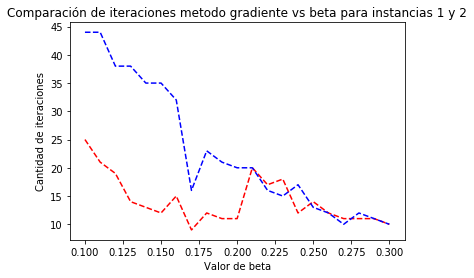

In [48]:
# graficos de 2 instancias metodo de gradiente para beta variando
t = arange(0.1, 0.31, 0.01)
plt.plot(t, array(datos_grad[0,:])[0], 'r--', t, array(datos_grad[1,:])[0], 'b--')
plt.title("Comparación de iteraciones metodo gradiente vs beta para instancias 1 y 2")
plt.xlabel("Valor de beta")
plt.ylabel("Cantidad de iteraciones")
plt.show()

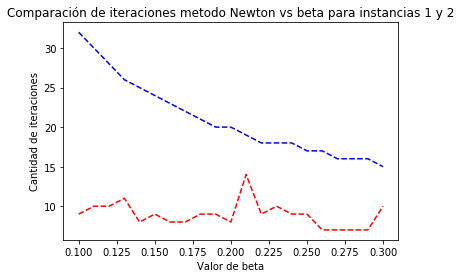

In [49]:
# graficos de 2 instancias metodo de newton para beta variando
plt.plot(t, array(datos_new[0,:])[0], 'r--', t, array(datos_new[1,:])[0], 'b--')
plt.title("Comparación de iteraciones metodo Newton vs beta para instancias 1 y 2")
plt.xlabel("Valor de beta")
plt.ylabel("Cantidad de iteraciones")
plt.show()